In [41]:
import pandas as pd 
import nltk 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from Preprocesing import Process_column
import re

In [42]:
train = pd.read_csv("train.txt",names=['text', 'label'],sep=";")
test = pd.read_csv("test.txt",names=['text', 'label'],sep=";")


In [43]:
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [44]:
train.duplicated().sum()

np.int64(1)

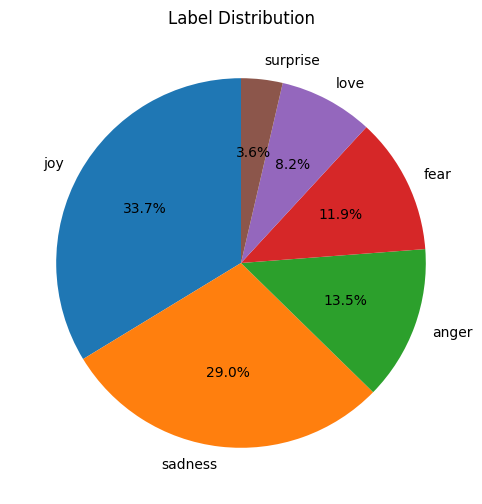

In [45]:
plt.figure(figsize=(6,6))
plt.title("Label Distribution")
plt.pie(train["label"].value_counts(),labels=train["label"].value_counts().keys(),autopct="%1.1f%%",startangle=90)
plt.show()


In [46]:
train["CleanedText"] = train["text"].apply(lambda x: x.lower())
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,im having ssa examination tomorrow in the morn...
17996,i constantly worry about their fight against n...,joy,i constantly worry about their fight against n...
17997,i feel its important to share this info for th...,joy,i feel its important to share this info for th...
17998,i truly feel that if you are passionate enough...,joy,i truly feel that if you are passionate enough...


In [47]:
column = Process_column(Column_name="CleanedText",Dataset=train)

In [48]:
column.Updeate_column(func=lambda x: re.sub(r"\b[a-zA-Z]{1}\b"," ",x))
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute to post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,am feeling grouchy
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,im having ssa examination tomorrow in the morn...
17996,i constantly worry about their fight against n...,joy,constantly worry about their fight against n...
17997,i feel its important to share this info for th...,joy,feel its important to share this info for th...
17998,i truly feel that if you are passionate enough...,joy,truly feel that if you are passionate enough...


In [49]:
from nltk.tokenize import word_tokenize


column.Updeate_column(lambda x: word_tokenize(x))
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[can, go, from, feeling, so, hopeless, to, so,..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, to, post, feel, greedy,..."
3,i am ever feeling nostalgic about the fireplac...,love,"[am, ever, feeling, nostalgic, about, the, fir..."
4,i am feeling grouchy,anger,"[am, feeling, grouchy]"
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,"[im, having, ssa, examination, tomorrow, in, t..."
17996,i constantly worry about their fight against n...,joy,"[constantly, worry, about, their, fight, again..."
17997,i feel its important to share this info for th...,joy,"[feel, its, important, to, share, this, info, ..."
17998,i truly feel that if you are passionate enough...,joy,"[truly, feel, that, if, you, are, passionate, ..."


In [50]:
from nltk.corpus import stopwords


_stopwords = stopwords.words("english")
print(f"Number of Stop Words in English = {len(_stopwords)}")

Number of Stop Words in English = 198


In [51]:
def Remove_Stopwords(text):
    return [word for word in text if word not in _stopwords]

In [52]:
column.Updeate_column(Remove_Stopwords)
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,"[feeling, grouchy]"
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,"[im, ssa, examination, tomorrow, morning, im, ..."
17996,i constantly worry about their fight against n...,joy,"[constantly, worry, fight, nature, push, limit..."
17997,i feel its important to share this info for th...,joy,"[feel, important, share, info, experience, thing]"
17998,i truly feel that if you are passionate enough...,joy,"[truly, feel, passionate, enough, something, s..."


In [53]:
from nltk.stem import WordNetLemmatizer

Lemmarizer = WordNetLemmatizer()
def Lemmatizong_data(text:list):
    return [Lemmarizer.lemmatize(word=word,pos="v") for word in text]

column.Updeate_column(Lemmatizong_data)
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliate]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feel, hopeless, damn, hopeful, around, so..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grab, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feel, nostalgic, fireplace, know, still..."
4,i am feeling grouchy,anger,"[feel, grouchy]"
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,"[im, ssa, examination, tomorrow, morning, im, ..."
17996,i constantly worry about their fight against n...,joy,"[constantly, worry, fight, nature, push, limit..."
17997,i feel its important to share this info for th...,joy,"[feel, important, share, info, experience, thing]"
17998,i truly feel that if you are passionate enough...,joy,"[truly, feel, passionate, enough, something, s..."


In [54]:
def to_string(text:list):
    return " ".join(text)

column.Updeate_column(to_string)
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hopeful around someone c...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,anger,feel grouchy
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,im ssa examination tomorrow morning im quite w...
17996,i constantly worry about their fight against n...,joy,constantly worry fight nature push limit inner...
17997,i feel its important to share this info for th...,joy,feel important share info experience thing
17998,i truly feel that if you are passionate enough...,joy,truly feel passionate enough something stay tr...


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [56]:
X = train["CleanedText"]
Y = train["label"]

In [57]:
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [58]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_text)

In [59]:
print(f"number of Features = {len(tfidf.get_feature_names_out())}")

number of Features = 10689


In [60]:
svc = SVC(random_state=42)
svc

SVC(random_state=42)

In [61]:
svc.fit(x_train,y_train)
y_predicted = svc.predict(x_test)

In [62]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"SVM Accurecy score = {svm_acc * 100:.02f}%")

SVM Accurecy score = 84.20%


In [63]:
Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(x_train,y_train)
y_predicted = Dt.predict(x_test)

In [64]:
dt_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"Decision Tree Classifier Accurecy score = {dt_acc * 100:.02f}%")

Decision Tree Classifier Accurecy score = 81.89%


In [65]:
model = RandomForestClassifier(random_state=42,n_estimators=200,)
model

RandomForestClassifier(n_estimators=200, random_state=42)

In [66]:
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

In [67]:
acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"Multinomial Naive Bayes Accurecy score = {acc * 100:.02f}%")

Multinomial Naive Bayes Accurecy score = 86.11%
